In [52]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
combine = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1) Pre-processing of data

In [4]:
def extract_cabin_type(df):
    df['CabinType'] = df['Cabin'].astype(str).str[0]
extract_cabin_type(train_df)
extract_cabin_type(test_df)

In [5]:
train_df[["CabinType", "Survived"]].groupby(['CabinType'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,CabinType,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
8,n,0.299854
7,T,0.000000


In [6]:
combine = [train_df, test_df]


In [7]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [8]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [9]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinType,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,1


In [10]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 12), (418, 12))

In [11]:
train_df['CabinType'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [12]:
title_mapping = {'n':0, 'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7, 'T':8}
for dataset in combine:
    dataset['CabinType'] = dataset['CabinType'].map(title_mapping)
    dataset['CabinType'] = dataset['CabinType'].fillna(0)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinType,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,3
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [13]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinType,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,1,3
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,1


In [72]:
guess_ages = np.zeros((2,3))

In [14]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinType,Title
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C,1,3
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,1,1,1,35,1,0,113803,53.1000,C123,S,1,3
4,0,3,0,35,0,0,373450,8.0500,NaN,S,0,1


In [15]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 7)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

<ipython-input-15-8d3e1f3bff95>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 11.429]",0.573529
1,"(11.429, 22.857]",0.409756
2,"(22.857, 34.286]",0.314448
3,"(34.286, 45.714]",0.426829
4,"(45.714, 57.143]",0.411765
5,"(57.143, 68.571]",0.346154
6,"(68.571, 80.0]",0.142857


In [16]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 11.42, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11.42) & (dataset['Age'] <= 22.857), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 22.857) & (dataset['Age'] <= 34.286), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 34.286) & (dataset['Age'] <= 45.714), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 45.714) & (dataset['Age'] <= 57.143), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 57.143) & (dataset['Age'] <= 68.571), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 68.571, 'Age'] = 6
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinType,Title,AgeBand
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0,1,"(11.429, 22.857]"
1,1,1,1,3,1,0,PC 17599,71.2833,C85,C,1,3,"(34.286, 45.714]"
2,1,3,1,2,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,"(22.857, 34.286]"
3,1,1,1,3,1,0,113803,53.1000,C123,S,1,3,"(34.286, 45.714]"
4,0,3,0,3,0,0,373450,8.0500,NaN,S,0,1,"(34.286, 45.714]"


In [17]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinType,Title
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,1,3,1,0,PC 17599,71.2833,C85,C,1,3
2,1,3,1,2,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,1,1,1,3,1,0,113803,53.1000,C123,S,1,3
4,0,3,0,3,0,0,373450,8.0500,NaN,S,0,1


In [18]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinType,Title
0,0,3,0,1,1,0,7.2500,S,0,1
1,1,1,1,3,1,0,71.2833,C,1,3
2,1,3,1,2,0,0,7.9250,S,0,2
3,1,1,1,3,1,0,53.1000,S,1,3
4,0,3,0,3,0,0,8.0500,S,0,1


In [19]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [20]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinType,Title
0,0,3,0,1,1,0,7.2500,0,0,1
1,1,1,1,3,1,0,71.2833,1,1,3
2,1,3,1,2,0,0,7.9250,0,0,2
3,1,1,1,3,1,0,53.1000,0,1,3
4,0,3,0,3,0,0,8.0500,0,0,1


In [21]:
dataset.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [22]:
dataset['Fare'].interpolate(method='quadratic', inplace=True)

<ipython-input-22-cf9a950c1636>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Fare'].interpolate(method='quadratic', inplace=True)


In [23]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 6)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

<ipython-input-23-fc03726bf165>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [24]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.775, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.775) & (dataset['Fare'] <=  8.662), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] >  8.662) & (dataset['Fare'] <= 14.454), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 26.0), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 26.0) & (dataset['Fare'] <= 52.369), 'Fare'] = 4
    dataset.loc[ dataset['Fare'] > 52.369, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinType,Title
0,0,3,0,1,1,0,0,0,0,1
1,1,1,1,3,1,0,5,1,1,3
2,1,3,1,2,0,0,1,0,0,2
3,1,1,1,3,1,0,5,0,1,3
4,0,3,0,3,0,0,1,0,0,1
5,0,3,0,2,0,0,1,2,0,1
6,0,1,0,4,0,0,4,0,2,1
7,0,3,0,0,3,1,3,0,0,4
8,1,3,1,2,0,2,2,0,0,3
9,1,2,1,1,1,0,4,1,0,3


In [25]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinType,Title
0,892,3,0,2,0,0,1,2,0,1
1,893,3,1,4,1,0,0,0,0,3
2,894,2,0,5,0,0,2,2,0,1
3,895,3,0,2,0,0,2,0,0,1
4,896,3,1,1,1,1,2,0,0,3


In [27]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [55]:
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [1, 2, 3, 4, 5, 6, 7],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6]
}

### Fine-tunning Decision Tree

In [56]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 1890.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

In [57]:
best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [58]:
acc_decision_tree = round(best_dt.score(X_train, Y_train) * 100, 2)
print(f"Test Accuracy: {acc_decision_tree:.2f}")

Test Accuracy: 84.18


## 2) Decision Tree Plot 

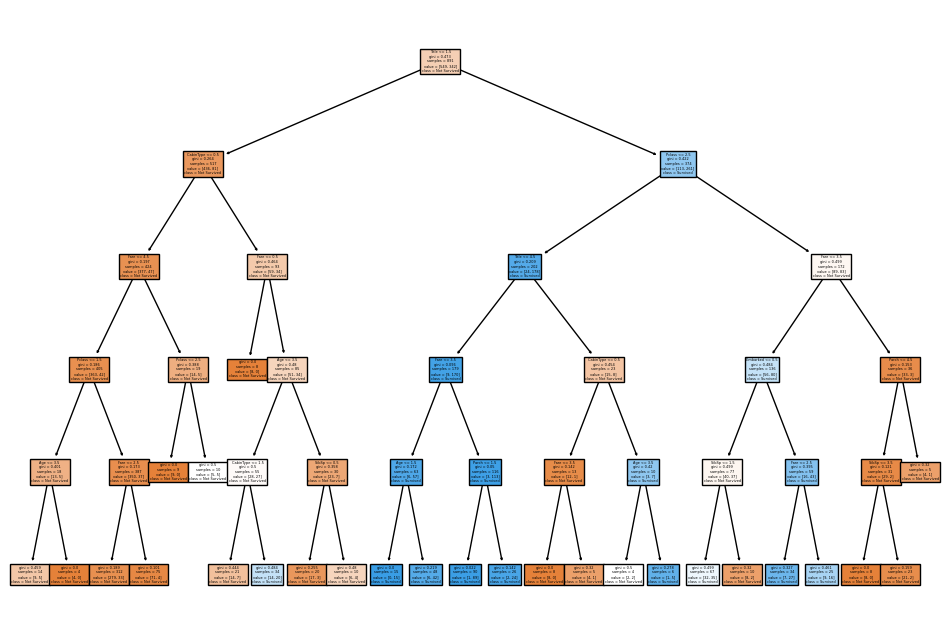

In [59]:
plt.figure(figsize=(12, 8))
plot_tree(best_dt, feature_names=X_train.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

 ## 3) Applying the five-fold cross validation on Decision Tree

In [71]:
cv_scores = cross_val_score(best_dt, X_train, Y_train, cv=5, scoring='accuracy')
avg_cv_accuracy = np.mean(cv_scores)
print(f"Average 5-Fold Cross-Validation Accuracy: {avg_cv_accuracy:.2f}")
cv_scores

Average 5-Fold Cross-Validation Accuracy: 0.83


array([0.84357542, 0.78089888, 0.83707865, 0.79775281, 0.87078652])

In [62]:
param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [2, 3, 4, 5, 6, 7, 8],
    "min_samples_split": [2, 3, 4, 5, 6, 7],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6]
}

In [64]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [65]:
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [66]:
acc_rf = round(best_rf.score(X_train, Y_train) * 100, 2)
print(f"Test Accuracy: {acc_rf:.2f}")

Test Accuracy: 87.65


 ## 3) Applying the five-fold cross validation on Random Forest

In [70]:
cv_scores = cross_val_score(best_rf, X_train, Y_train, cv=5, scoring='accuracy')
avg_cv_accuracy = np.mean(cv_scores)
print(f"Average 5-Fold Cross-Validation Accuracy: {avg_cv_accuracy:.2f}")
cv_scores

Average 5-Fold Cross-Validation Accuracy: 0.83


array([0.84916201, 0.80898876, 0.83707865, 0.80898876, 0.85955056])

#### Both Decision Tree and Random Forest yield an average 5-fold cross-validation accuracy of 0.83, meaning they perform similarly in terms of generalization ability. However, the Random Forest is the better choice because it is more robust, stable, and less prone to overfitting. As it achieves a higher training accuracy (87.65%) compared to Decision Tree (84.18%), indicating it captures more patterns. Additionally, Random Forest reduces variance by averaging multiple trees, making it less sensitive to data fluctuations. However, Decision Trees are easier to interpret and visualize, making them preferable in cases where model explainability is crucial. For larger datasets, Random Forest is typically the superior option due to better generalization and noise handling.
